# Calculating Coverage Percentage of the AOI by an Item

This notebook demonstrates the use of pystac-client to calculate the percentage an Item's geometry that intesects with the area of interest (AOI) specified in the search by the `intersects` parameter.

In [1]:
from pystac_client import Client

import matplotlib.pyplot as plt
from shapely.geometry import shape
from pystac_client import Client
from pystac.item import Item
from typing import Dict, Any

In [3]:
def intersection_percent(item: Item, aoi: Dict[str, Any]) -> float:
    '''The percentage that the Item's geometry intersects the AOI. An Item that
    completely covers the AOI has a value of 100.
    '''
    geom_item = shape(item.geometry)
    geom_aoi = shape(aoi)

    intersected_geom = geom_aoi.intersection(geom_item)

    intersection_percent = (intersected_geom.area * 100) / geom_aoi.area

    return intersection_percent


# STAC API root URL
URL = 'https://planetarycomputer.microsoft.com/api/stac/v1'

# geometry of the AOI to search over
intersects_geometry = {
    "type": "Polygon",
    "coordinates": [
        [
            [-73.21, 43.99],
            [-73.21, 47.05],
            [-70.12, 47.05],
            [-70.12, 43.99],
            [-73.21, 43.99],
        ]
    ],
}

# Create a Client and an ItemSearch representing our search
# No search operations will be performed until we call the items() method
client = Client.open(URL)
item_search = client.search(
    collections=["sentinel-2-l2a"], intersects=intersects_geometry, max_items=100
)

In [4]:
print([f"{intersection_percent(item, intersects_geometry):.2f}" for item in item_search.items()])

['0.26', '1.86', '1.69', '1.48', '0.35', '2.67', '6.15', '9.56', '2.90', '0.22', '0.39', '1.91', '1.69', '1.48', '0.35', '3.09', '14.93', '14.69', '14.47', '3.58', '3.59', '14.91', '14.67', '14.44', '3.15', '1.21', '9.21', '8.94', '2.11', '0.78', '1.26', '2.64', '9.22', '5.72', '2.31', '0.08', '2.14', '9.83', '9.37', '8.85', '1.89', '0.30', '1.88', '1.69', '1.48', '0.35', '2.85', '6.33', '9.74', '2.95', '0.26', '0.39', '1.91', '1.69', '1.48', '0.35', '3.09', '14.93', '14.69', '14.47', '3.58', '3.59', '14.91', '14.67', '14.44', '3.15', '1.22', '7.28', '9.22', '8.94', '2.11', '0.76', '1.19', '2.62', '9.14', '5.64', '2.23', '0.07', '2.14', '9.83', '9.37', '8.83', '1.88', '0.30', '1.88', '1.69', '1.48', '0.35', '2.84', '6.34', '9.73', '2.94', '0.26', '0.39', '1.91', '1.69', '1.48', '0.35', '3.09', '14.93']


In [5]:
# create a generator that filters to only those Items that intersect more than 5%
items_gt_5_percent = (
    i for i in item_search.items() if intersection_percent(i, intersects_geometry) > 5
)

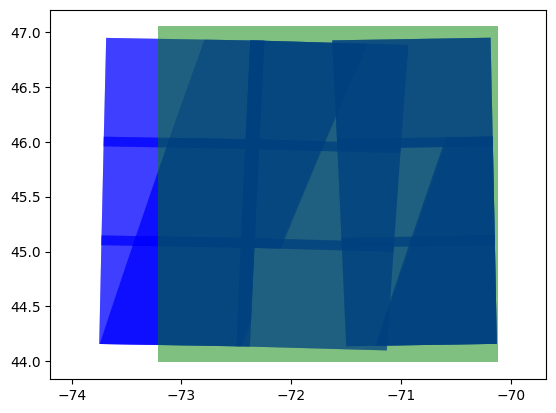

In [6]:
# Render the AOI and Item results
# The green shape is the AOI
# The blue shapes are the Item geometries
# If there are no blue shapes, adjust the intersection percent filter above until there are

cm = plt.get_cmap('RdBu')
fig, axs = plt.subplots()
axs.set_aspect('equal', 'datalim')

for item in items_gt_5_percent:
  xs, ys = shape(item.geometry).exterior.xy
  axs.fill(xs, ys, alpha=0.5, fc='b', ec='none')

geom_intersects = shape(intersects_geometry)
xs, ys = geom_intersects.exterior.xy
axs.fill(xs, ys, alpha=0.5, fc='g', ec='none')

plt.show()